Visualization of the data mart 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import snowflake.connector

In [2]:
conn = snowflake.connector.connect(
    user="VIMUTHU04",
    password="Vimuthu20042007",
    account="dlbgnxt-iu64182",
    warehouse="COMPUTE_WH",
    database="EXCHANGE_RATES_SL",
    schema="DW"
)

query = "SELECT * FROM PREDICTION_FEATURES"
df = pd.read_sql(query, conn)

conn.close()

print("📊 Sample Data:")
display(df.head())

print("\n🧾 Column Types:")
print(df.dtypes)

C:\Users\vimuthu_hone\AppData\Local\Temp\ipykernel_9432\2048401794.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


📊 Sample Data:


,DATE,USD,EUR,GBP,INR,RUB,CNY,AUD,TOURISM_SL,SRI_LANKA_GDP_USD_BILLIONS_USD,ANNUAL_CHANGE_PCR,PER_CAPITA_USD,MERCHANDISE_EXPORTS_MILLIONS_USD,LABOUR_MIGRATION_SL,MERCHANDISE_IMPORTS_MILLIONS_USD,INFLATION_RATE_PCR,GDP_PER_CAPITA_USD,GDP_GROWTH_PCT
0,2010-05-07,113.6975,144.1798,168.5850,2.5060,3.7118,16.6547,101.1737,NaN,6.3899,0.0197,1.9733,9293.0822,265937.6959,15804.4764,0.0639,2978.88,8.2416
1,2010-05-11,113.6292,145.3033,168.7962,2.5406,3.7332,16.6431,102.5390,NaN,6.3954,0.0195,1.9486,9314.2658,265887.8767,15879.1932,0.0640,2983.38,8.2487
2,2010-05-12,113.6854,143.7779,169.3571,2.5328,3.7560,16.6513,101.8166,NaN,6.3968,0.0194,1.9425,9319.5616,265875.4219,15897.8723,0.0640,2984.51,8.2505
3,2010-05-13,113.7009,143.8316,168.9141,2.5340,3.7911,16.6509,102.1318,NaN,6.3981,0.0194,1.9363,9324.8575,265862.9671,15916.5515,0.0640,2985.64,8.2523
4,2010-05-14,113.6573,142.5660,166.1215,2.5333,3.7834,16.6476,101.8369,NaN,6.3995,0.0193,1.9301,9330.1534,265850.5123,15935.2307,0.0640,2986.76,8.2541



🧾 Column Types:
DATE                                 object
USD                                 float64
EUR                                 float64
GBP                                 float64
INR                                 float64
RUB                                 float64
CNY                                 float64
AUD                                 float64
TOURISM_SL                          float64
SRI_LANKA_GDP_USD_BILLIONS_USD      float64
ANNUAL_CHANGE_PCR                   float64
PER_CAPITA_USD                      float64
MERCHANDISE_EXPORTS_MILLIONS_USD    float64
LABOUR_MIGRATION_SL                 float64
MERCHANDISE_IMPORTS_MILLIONS_USD    float64
INFLATION_RATE_PCR                  float64
GDP_PER_CAPITA_USD                  float64
GDP_GROWTH_PCT                      float64
dtype: object


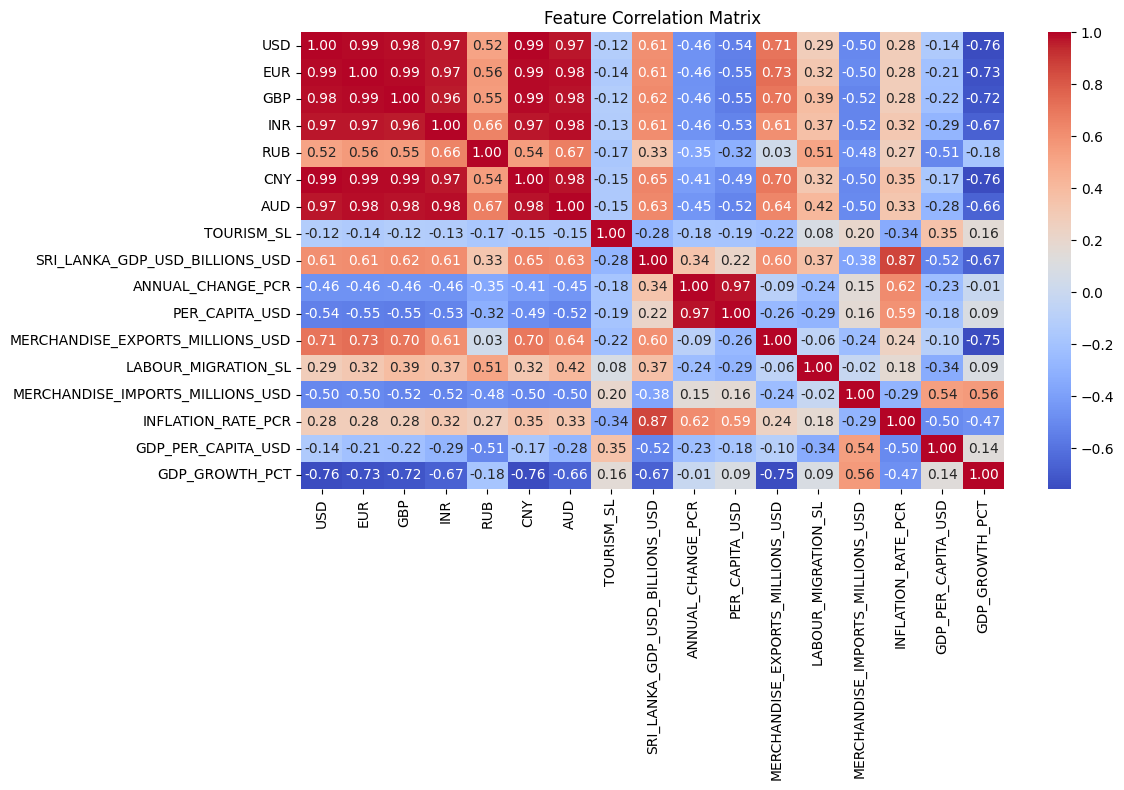

In [3]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.tight_layout()
plt.show()


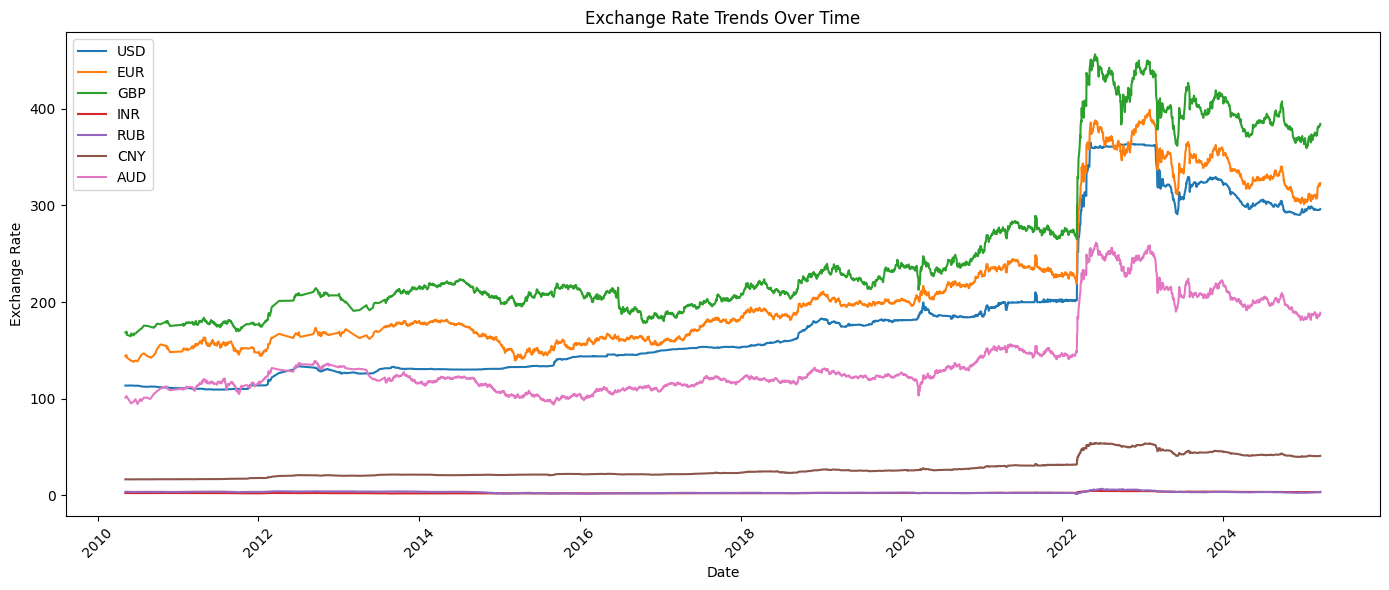

In [5]:
plt.figure(figsize=(14, 6))
for currency in ["USD", "EUR", "GBP", "INR", "RUB", "CNY", "AUD"]:
    sns.lineplot(data=df, x="DATE", y=currency, label=currency)

plt.title("Exchange Rate Trends Over Time")
plt.xlabel("Date")
plt.ylabel("Exchange Rate")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
